In [ ]:
# 2019-02-19
# In order to split up the emo fear to feel/suppress and stroop to congruent/incongruent,

# After thoroughly looking through what I had:
# emo fear is already split and not a problem, just have to redo the "do_glm" shell script with added contrasts
# stroop: during previous preprocessing (which I lost the code somehow, not even uploaded to git)

# must generate the proper glms for stroop, which this notebook will be taking care of:

[1] 4166   35

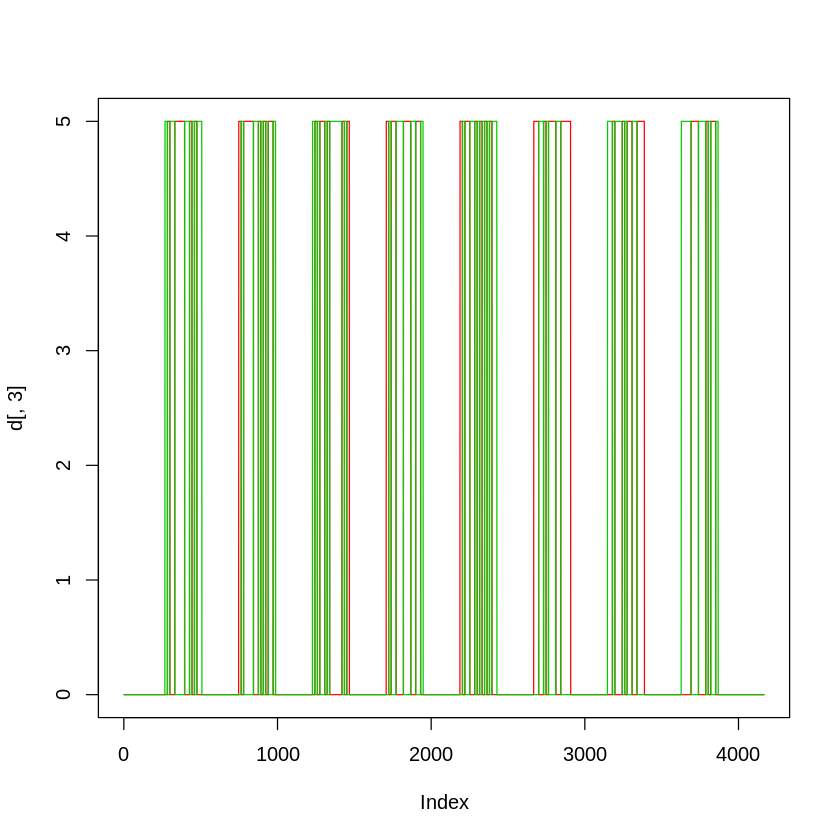

In [22]:
# reminding myself what the "raw" data looks like
# grabbing an example dataset
d <- read.table('Fatigue_files_for_Yanlu_180323/AB-1415/AB-1415_stroop_post_no_HRV.txt')
dim(d)
plot(d[,3], type='l', col=2)
lines(d[,2], col=3)

# Information to take from this cell:
# for stroop datasets, col 2 is congruent, col 3 is incongruent for no HRV sets
# and 3 is congruent, 4 is incongruent for normal sets.

In [23]:
# use existing rfunctions.R
source('fnirs_rfunctions.R')

In [36]:
# generating files list
files <- list.files(path="Fatigue_files_for_Yanlu_180323/", 
                    pattern=c('stroop', 'no_HRV'), 
                    full.names=TRUE, recursive=TRUE)
file_list <- files[!grepl('no_HRV',files)]
print(file_list)

 [1] "Fatigue_files_for_Yanlu_180323//AB-1415/AB-1415_stroop_post.txt"
 [2] "Fatigue_files_for_Yanlu_180323//AB-1415/AB-1415_stroop_pre.txt" 
 [3] "Fatigue_files_for_Yanlu_180323//AG-7347/AG-7347_stroop_post.txt"
 [4] "Fatigue_files_for_Yanlu_180323//AG-7347/AG-7347_stroop_pre.txt" 
 [5] "Fatigue_files_for_Yanlu_180323//AH-1102/AH-1102_stroop_post.txt"
 [6] "Fatigue_files_for_Yanlu_180323//AH-1102/AH-1102_stroop_pre.txt" 
 [7] "Fatigue_files_for_Yanlu_180323//BJ-4714/BJ-4714_stroop_post.txt"
 [8] "Fatigue_files_for_Yanlu_180323//BJ-4714/BJ-4714_stroop_pre.txt" 
 [9] "Fatigue_files_for_Yanlu_180323//BN-9457/BN-9457_stroop_post.txt"
[10] "Fatigue_files_for_Yanlu_180323//BN-9457/BN-9457_stroop_pre.txt" 
[11] "Fatigue_files_for_Yanlu_180323//DA-5186/DA-5186_stroop_post.txt"
[12] "Fatigue_files_for_Yanlu_180323//DA-5186/DA-5186_stroop_pre.txt" 
[13] "Fatigue_files_for_Yanlu_180323//DB-7900/DB-7900_stroop_post.txt"
[14] "Fatigue_files_for_Yanlu_180323//DB-7900/DB-7900_stroop_pre.txt" 
[15] "

In [57]:
# test to grab file name
# grabbing random file
getFileName <- function( file.name.entry ) {
    t1 <- file.name.entry
    t1_split <- strsplit(t1, '/')
    fn <- rev(t1_split[[1]])[1]
    r.o <- sub('\\.txt$', '', fn) 
    return( r.o )
}

In [60]:
# main loop
N <- length(file_list)
for ( i in 1:N ) {
    d <- importData(file_list[i]);
    glm1 <- d$glm1/5;
    glm2 <- d$glm2/5;
    this_file_name <- getFileName(file_list[i])
    write.table(glm1, file=paste0(this_file_name,'.glm2'), col.names=FALSE, row.names=FALSE, quote=FALSE)
    write.table(glm2, file=paste0(this_file_name,'.glm3'), col.names=FALSE, row.names=FALSE, quote=FALSE)
}
# since glm1 already exists from prior processing, changing labels:
# glm2 = congruent only
# glm3 = incongruent only
# (glm1 = both congruent and incongruent)